In [79]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_prompt').css('opacity', 0);  // do not show output prompt
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to hide/unhide code."></form>''')

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'your_file')
df.head()

,HIGHEST_EDUC_LVL,SAL_ADMIN_PLAN,JOBTITLE,ETH_GRP_DESCR,SEX,ANNUAL_RT,EMPL_ST_DESCR,FULL_PART_TIME,COMPANY,PAYGROUP,YEARS_AT_HONDA,YRS_IN_TITLE,EMPL_TYP_DESCR
0,A,BUS,Senior Staff Administrator,White (Not Hispanic or Latino),M,123272.08,Active,F,HAM,SAL,34.484932,24.791781,Salaried
1,A,ENG,Senior Staff Engineer,White (Not Hispanic or Latino),M,126608.82,Active,F,HAM,SAL,34.484932,14.684932,Salaried
2,A,ENG,Staff Engineer,White (Not Hispanic or Latino),M,108450.00,Active,F,HAM,SAL,34.484932,23.200000,Salaried
3,A,EXC,Chief Engineer,White (Not Hispanic or Latino),M,202569.43,Active,F,HAM,EXE,34.484932,16.526027,Salaried
4,A,ENG,Engineering Staff,Default,M,54486.00,Active,F,HAM,ECI,0.884932,0.884932,Salaried


### All Associates:

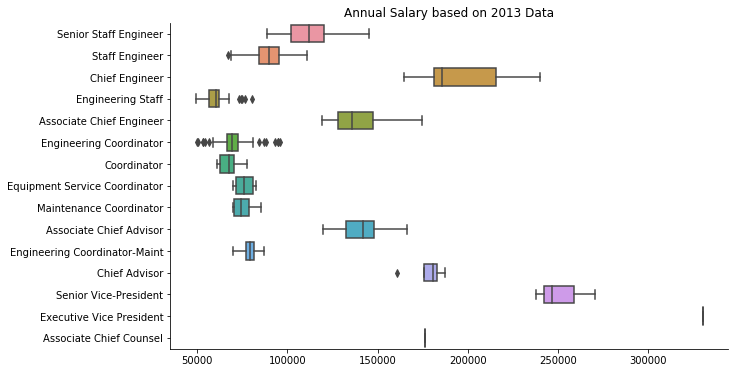

In [4]:
criteria1 = df.ANNUAL_RT > 0
criteria2 = df.SAL_ADMIN_PLAN.isin(['ENG','EXC'])
criteria3 = df.COMPANY == 'HAM'
engineers = df[criteria1 & criteria2 & criteria3]

fig, axes = plt.subplots(figsize=(10,6))
sns.boxplot(x='ANNUAL_RT', y='JOBTITLE', data=engineers, ax=axes)
sns.despine()
plt.title('Annual Salary based on 2013 Data')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Let's Limit to Just Engineering or Executive Staff Members and Control Sort Order:

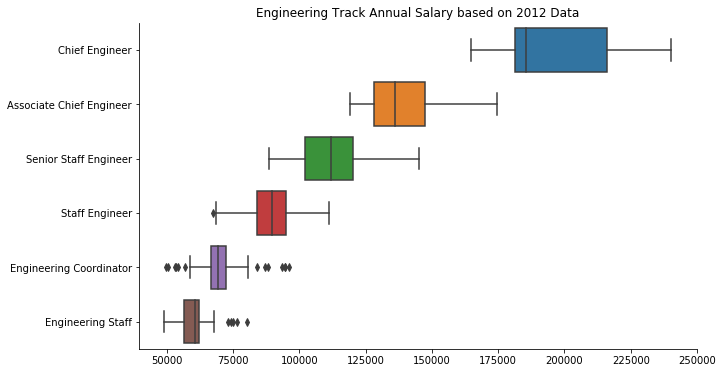

In [5]:
criteria1 = df.JOBTITLE.isin(['Engineering Coordinator', 'Staff Engineer', 'Engineering Staff', 
                              'Senior Staff Engineer', 'Associate Chief Engineer', 'Chief Engineer'])
criteria2 = df.ANNUAL_RT > 0
criteria3 = df.SAL_ADMIN_PLAN.isin(['ENG','EXC'])
criteria4 = df.COMPANY == 'HAM'
engineers = df[criteria1 & criteria2 & criteria3 & criteria4]
engineers['JOBTITLE'] = engineers['JOBTITLE'].astype('category')
engineers.JOBTITLE.cat.set_categories(['Chief Engineer','Associate Chief Engineer','Senior Staff Engineer',
                                 'Staff Engineer','Engineering Coordinator','Engineering Staff'], inplace=True)

fig, axes = plt.subplots(figsize=(10,6))
sns.boxplot(x='ANNUAL_RT', y='JOBTITLE', data=engineers, ax=axes)
sns.despine()
plt.title('Engineering Track Annual Salary based on 2012 Data')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Add Grid Lines and Re-Format X-Axis Labels:

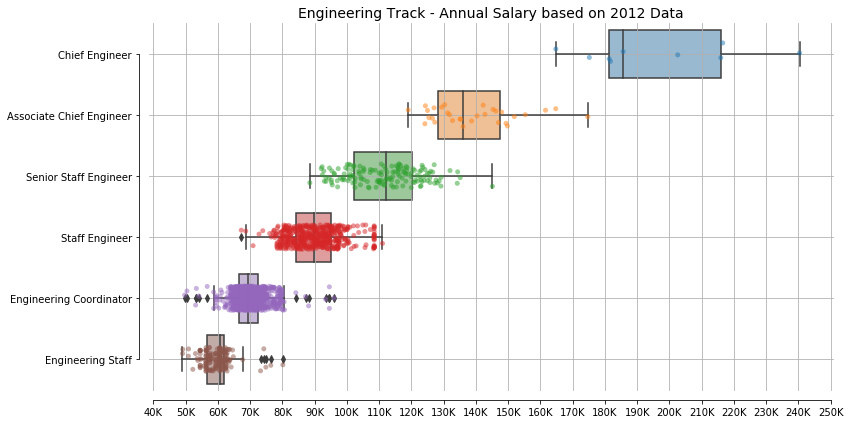

In [63]:
fig, axes = plt.subplots(figsize=(12, 6))
axes.xaxis.set_major_locator(ticker.MultipleLocator(10000))

# Create boxplot and make the facecolor more transparent
sns.boxplot(x="ANNUAL_RT", y="JOBTITLE", data=engineers, ax=axes, )
for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.5))

# Add strip/jitter plot with semi-transparent data circles
sns.stripplot(x="ANNUAL_RT", y="JOBTITLE", data=engineers,
              size=5, jitter=0.2, edgecolor="white", alpha=0.5)

sns.despine(offset=10, trim=True)

plt.title('Engineering Track - Annual Salary based on 2012 Data', fontsize=14)
plt.grid(True)
plt.xlabel('')
plt.ylabel('')
fig.tight_layout()
labels = [str(int(int(item.get_text())/1000))+"K" for item in axes.get_xticklabels()]
axes.set_xticklabels(labels)
plt.show()

### Let's Look at Salaries by Sex:

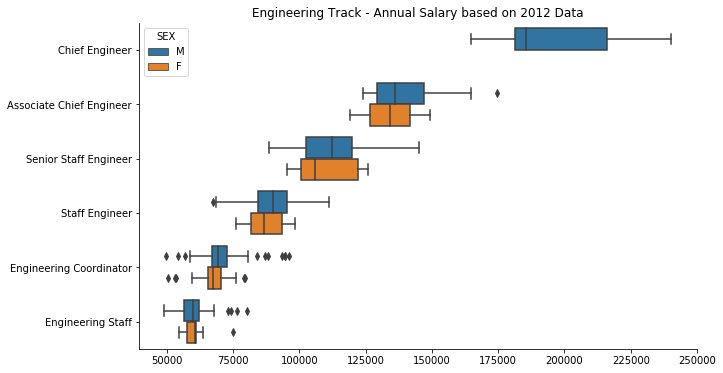

In [35]:
criteria1 = df.JOBTITLE.isin(['Engineering Coordinator', 'Staff Engineer', 'Engineering Staff', 
                              'Senior Staff Engineer', 'Associate Chief Engineer', 'Chief Engineer'])
criteria2 = df.ANNUAL_RT > 0
criteria3 = df.SAL_ADMIN_PLAN.isin(['ENG','EXC'])
criteria4 = df.COMPANY == 'HAM'
engineers = df[criteria1 & criteria2 & criteria3 & criteria4]
engineers['JOBTITLE'] = engineers['JOBTITLE'].astype('category')
engineers.JOBTITLE.cat.set_categories(['Chief Engineer','Associate Chief Engineer','Senior Staff Engineer',
                                 'Staff Engineer','Engineering Coordinator','Engineering Staff'], inplace=True)

fig, axes = plt.subplots(figsize=(10,6))
sns.boxplot(x='ANNUAL_RT', y='JOBTITLE', data=engineers, hue='SEX', ax=axes)
sns.despine()
plt.title('Engineering Track - Annual Salary based on 2012 Data')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [123]:
median = pd.pivot_table(engineers, values='ANNUAL_RT', index='JOBTITLE', aggfunc='median')

In [124]:
median

,ANNUAL_RT
JOBTITLE,
Chief Engineer,185656.800
Associate Chief Engineer,135982.430
Senior Staff Engineer,112106.045
Staff Engineer,89779.590
Engineering Coordinator,69192.205
Engineering Staff,60540.000


In [118]:
engineers.groupby(by='JOBTITLE').describe()

ANNUAL_RT                                          \
                             count           mean           std        min   
JOBTITLE                                                                     
Chief Engineer                 9.0  195996.205556  24403.629435  164766.22   
Associate Chief Engineer      31.0  139298.658710  13380.463665  119000.00   
Senior Staff Engineer        152.0  111716.172829  11165.406392   88484.55   
Staff Engineer               496.0   90021.871512   7814.953934   67226.66   
Engineering Coordinator      832.0   69881.652885   4849.613632   49668.43   
Engineering Staff            167.0   59630.852455   4294.780658   49000.00   

                                                                           \
                                  25%         50%          75%        max   
JOBTITLE                                                                    
Chief Engineer            181330.9200  185656.800  215919.9200  240349.02   
Associate Chief Engineer  128321.7550  135982.430  147472.6950  174673.91   
Senior Staff Engineer     102122.6175  112106.045  120200.9375  145107.52   
Staff Engineer             84163.7025   89779.590   95084.4000  111022.48   
Engineering Coordinator    66663.2350   69192.205   72395.1600   95996.97   
Engineering Staff          56573.9200   60540.000   61987.1600   80122.04   

                         YEARS_AT_HONDA               ...                 \
                                  count       mean    ...            75%   
JOBTITLE                                              ...                  
Chief Engineer                      9.0  29.549772    ...      31.052055   
Associate Chief Engineer           31.0  26.142819    ...      30.313699   
Senior Staff Engineer             152.0  24.487906    ...      28.884932   
Staff Engineer                    496.0  22.349945    ...      27.772603   
Engineering Coordinator           832.0  19.180088    ...      27.542466   
Engineering Staff                 167.0   6.704930    ...       6.868493   

                                    YRS_IN_TITLE                       \
                                max        count       mean       std   
JOBTITLE                                                                
Chief Engineer            34.484932          9.0   7.969559  6.108510   
Associate Chief Engineer  34.197260         31.0   6.928325  4.019142   
Senior Staff Engineer     34.484932        152.0   9.036878  5.859404   
Staff Engineer            34.484932        496.0   9.826762  6.251940   
Engineering Coordinator   34.120548        832.0  10.690161  6.671643   
Engineering Staff         30.438356        167.0   4.246526  3.746317   

                                                                              
                               min       25%       50%        75%        max  
JOBTITLE                                                                      
Chief Engineer            1.356164  2.526027  5.517808  13.534247  16.526027  
Associate Chief Engineer  1.183562  3.523288  6.150685  10.523288  15.413699  
Senior Staff Engineer     0.895890  3.580822  7.694521  13.299315  23.583562  
Staff Engineer            0.895890  4.650000  9.391781  14.052055  26.545205  
Engineering Coordinator   0.923288  5.206164  9.976712  15.432877  29.221918  
Engineering Staff         0.884932  1.747945  2.879452   4.931507  17.608219  

[6 rows x 24 columns]